# FUNDAMENTALS OF DATA ANALYSIS WITH PYTHON <br><font color="crimson">DAY 4: DATA VISUALIZATION</font>

49th [GESIS Spring Seminar: Digital Behavioral Data](https://training.gesis.org/?site=pDetails&pID=0xA33E4024A2554302B3EF4AECFC3484FD)   
Cologne, Germany, March 2-6 2010

### Course Developers and Instructors 

* Dr. [John McLevey](www.johnmclevey.com), University of Waterloo (john.mclevey@uwaterloo.ca)     
* [Jillian Anderson](https://ca.linkedin.com/in/jillian-anderson-34435714a?challengeId=AQGaFXECVnyVqAAAAW_TLnwJ9VHAlBfinArnfKV6DqlEBpTIolp6O2Bau4MmjzZNgXlHqEIpS5piD4nNjEy0wsqNo-aZGkj57A&submissionId=16582ced-1f90-ec15-cddf-eb876f4fe004), Simon Fraser University (jillianderson8@gmail.com) 

<hr>

### Overview 

High-level overview coming soon... 

### Plan for the Day

1. ...

<hr>

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' # better resolution with vector graphics! 

In [61]:
data_dir = os.listdir('data/russian-troll-tweets')
files = [f for f in data_dir if 'csv' in f]
df = pd.concat((pd.read_csv('data/russian-troll-tweets/{}'.format(f), encoding='utf-8', low_memory=False) for f in files if 'csv' in f))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2946207 entries, 0 to 239349
Data columns (total 21 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   external_author_id  object
 1   author              object
 2   content             object
 3   region              object
 4   language            object
 5   publish_date        object
 6   harvested_date      object
 7   following           int64 
 8   followers           int64 
 9   updates             int64 
 10  post_type           object
 11  account_type        object
 12  retweet             int64 
 13  account_category    object
 14  new_june_2018       int64 
 15  alt_external_id     object
 16  tweet_id            int64 
 17  article_url         object
 18  tco1_step1          object
 19  tco2_step1          object
 20  tco3_step1          object
dtypes: int64(6), object(15)
memory usage: 494.5+ MB


In [62]:
df = df.sample(5000) # we will pull a random sampling to help with overplotting and to avoid slowing down the browser

> **NOTE**: I have content for all sections below. I am just moving stuff around to improve the narrative flow. I've temporarily moved content into another notebook and am putting the pieces back here as go! I'm starting with code and will add narrative text later. 

# PRINCIPLES FOR PRODUCING HIGH-QUALITY VISUALIZATIONS

# AN OBJECT-ORIENTED APPROACH TO VISUALIZATION

## Anatomy of a Plot

# DEVELOP VISUALIZATIONS ITERATIVELY

# BAR GRAPHS

In [4]:
cat_counts = df.groupby('account_category').size()
cat_counts

account_category
Commercial       204
Fearmonger        27
HashtagGamer     440
LeftTroll        691
NewsFeed        1042
NonEnglish      1340
RightTroll      1232
Unknown           24
dtype: int64

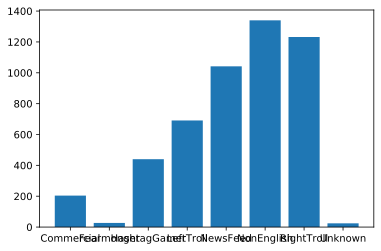

In [5]:
fig, ax = plt.subplots()
ax.bar(cat_counts.index, cat_counts)
plt.show()

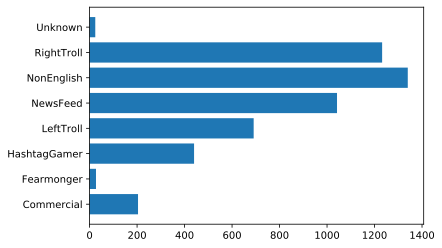

In [6]:
fig, ax = plt.subplots()
ax.barh(cat_counts.index, cat_counts)
plt.show()

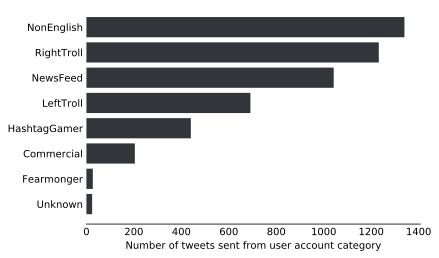

In [7]:
# reorder the series to reorder our bars
cat_counts = cat_counts.sort_values(ascending=True)

# initialize our figure and axes objects 
fig, ax = plt.subplots()

# draw the horizontal bars
ax.barh(cat_counts.index, cat_counts, color = '#32363A')

# add an xlabel 
ax.set_xlabel('Number of tweets sent from user account category')

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

# CLEVELAND DOT PLOTS

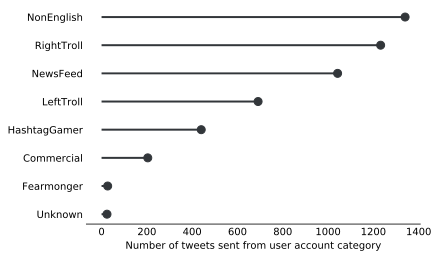

In [8]:
# reorder the series to reorder our bars
cat_counts = cat_counts.sort_values(ascending=True)

# initialize our figure and axes objects 
fig, ax = plt.subplots()

# draw the dots and horizontal lines
# this is the only part of this graph that differs from the horizontal bar chart above
ax.hlines(y=cat_counts.index, xmin=0, xmax=cat_counts, color='#32363A', linewidth=2)
ax.plot(cat_counts, cat_counts.index, "o", color='#32363A', markersize = 8)

# add an xlabel 
ax.set_xlabel('Number of tweets sent from user account category')

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

# STRIP PLOTS

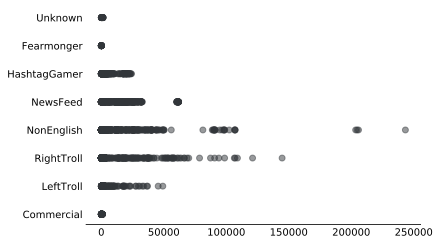

In [9]:
fig, ax = plt.subplots()
ax.scatter(df['followers'], df['account_category'], color='#32363A', alpha = .5)

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

plt.show()

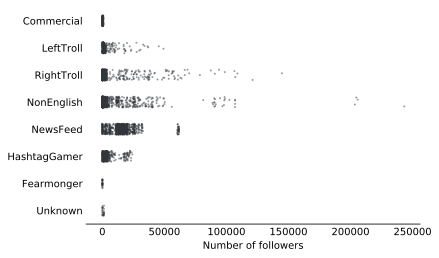

In [10]:
fig, ax = plt.subplots()
# matplotlib doesn't have a convenient jitter parameter, so we will use seaborn 
sns.stripplot(df['followers'], df['account_category'], color='#32363A', alpha = .5, jitter=0.2, size=2)

# remove spines for top, right, and left 
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)

# remove the tick marks on the left, but leave the labels
ax.tick_params(axis='both', which='both', length=0)

ax.set_ylabel('')
ax.set_xlabel('Number of followers')

plt.show()

# BOXPLOTS

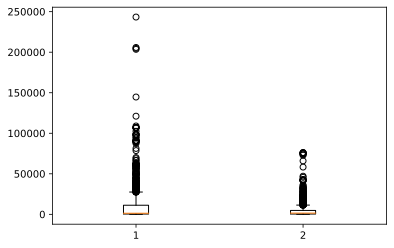

In [11]:
fig, ax = plt.subplots()
ax.boxplot([df['followers'], df['following']])
plt.show()

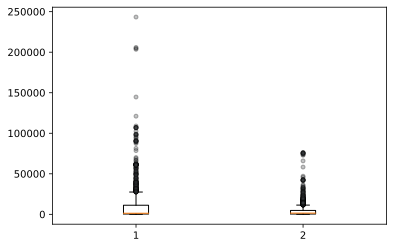

In [12]:
flierprops = dict(marker='o', markerfacecolor='#32363A', markersize=4,linestyle='none', alpha=.3)

fig, ax = plt.subplots()
ax.boxplot([df['followers'], df['following']], flierprops = flierprops)
plt.show()

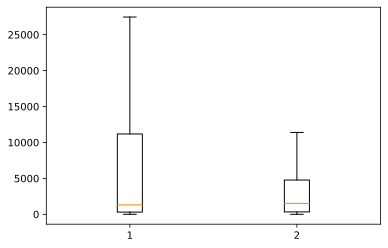

In [13]:
fig, ax = plt.subplots()
ax.boxplot([df['followers'], df['following']], showfliers=False)
plt.show()

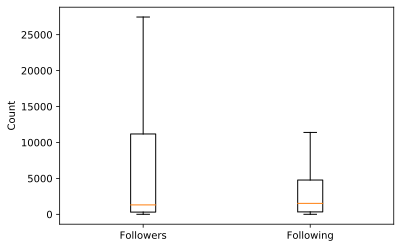

In [38]:
fig, ax = plt.subplots()
ax.boxplot([df['followers'], df['following']], showfliers=False)
ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count')
plt.show()

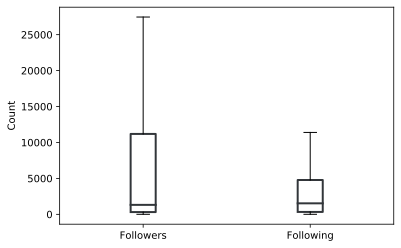

In [16]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([df['followers'], df['following']], showfliers=False, medianprops=medianprops, boxprops=boxprops)
ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count')
plt.show()

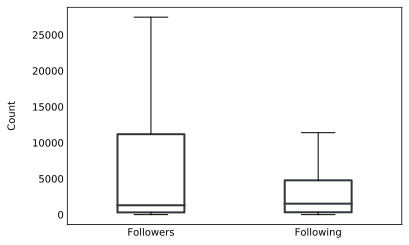

In [36]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([df['followers'], df['following']], 
           showfliers=False, medianprops=medianprops, boxprops=boxprops, widths=.4)

ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count\n')

ax.tick_params(axis='both', which='both', length=0)

plt.show()

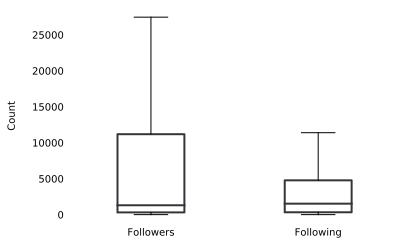

In [35]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()
ax.boxplot([df['followers'], df['following']], 
           showfliers=False, medianprops=medianprops, boxprops=boxprops, widths=.4)

ax.set_xticklabels(['Followers', 'Following'])
ax.set_ylabel('Count\n')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

plt.show()

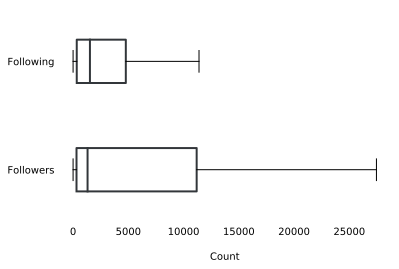

In [34]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2, color='#32363A')

fig, ax = plt.subplots()

# let's make these horizontal rather than vertical
ax.boxplot([df['followers'], df['following']], showfliers=False, 
           medianprops=medianprops, boxprops=boxprops, vert=False, widths=.4)

ax.set_yticklabels(['Followers', 'Following'])
ax.set_xlabel('\nCount')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

plt.show()

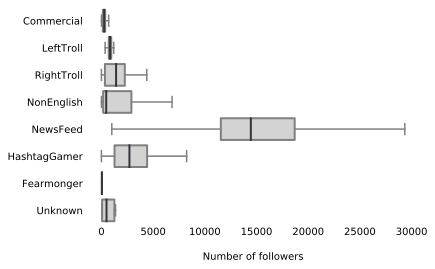

In [19]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2)

fig, ax = plt.subplots()

# this time we will use seaborn to simplify comparisons
sns.boxplot(x=df['followers'], y=df['account_category'], orient="h", color='lightgray', 
            showfliers=False, medianprops = medianprops, boxprops = boxprops)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

ax.set_xlabel('\nNumber of followers')
ax.set_ylabel('')

plt.show()

In [23]:
wo_newsfeed = df[df['account_category'] != "NewsFeed"]

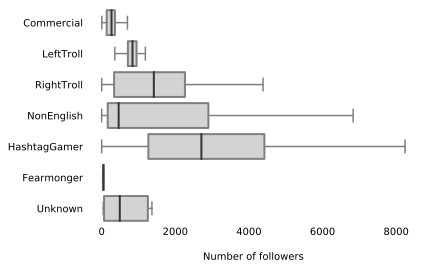

In [24]:
medianprops = dict(linewidth=2, color='#32363A')
boxprops = dict(linewidth=2)

fig, ax = plt.subplots()

# this time we will use seaborn to simplify comparisons
sns.boxplot(x=wo_newsfeed['followers'], y=wo_newsfeed['account_category'], orient="h", color='lightgray', 
            showfliers=False, medianprops = medianprops, boxprops = boxprops)

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis='both', which='both', length=0)

ax.set_xlabel('\nNumber of followers')
ax.set_ylabel('')

plt.show()


# HISTOGRAMS

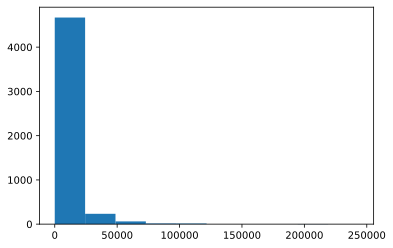

In [39]:
fig, ax = plt.subplots()
ax.hist(df['followers'])
plt.show()

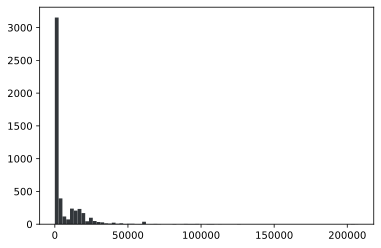

In [98]:
fig, ax = plt.subplots()
ax.hist(df['followers'], bins=80, color='#32363A')
plt.show()

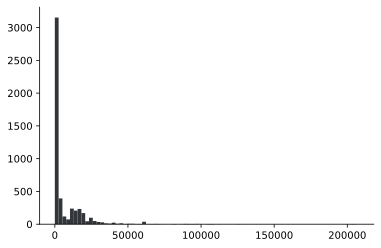

In [97]:
fig, ax = plt.subplots()

ax.hist(df['followers'], bins=80, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

In [80]:
drop_low = df[df['followers'] > 50]

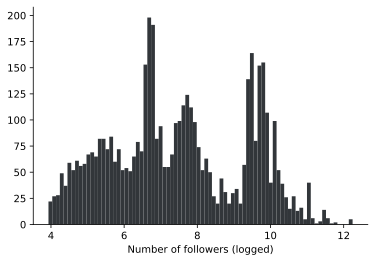

In [96]:
fig, ax = plt.subplots()

ax.hist(np.log(drop_low['followers']), bins=80, color='#32363A')
# ax.hist(np.log(drop_low['following']), bins=120) # throwing errors because of inf values 

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers (logged)')

plt.show()

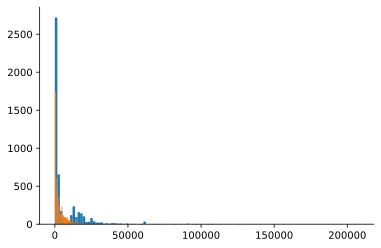

In [87]:
# WORKING ON THIS -- WILL BE BETTER ONCE I SOLVE LOG PROBLEM 

# fig, ax = plt.subplots()

# # we can log the x-axis
# ax.hist(df['followers'], bins=120, color='#32363A')
# ax.hist(df['following'], bins=120)

# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

# plt.show()

# SCATTERPLOTS

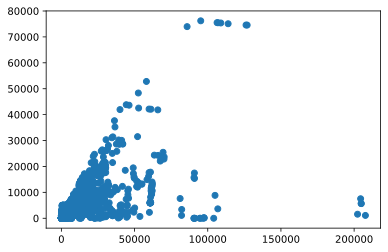

In [100]:
fig, ax = plt.subplots()
ax.scatter(df['followers'], df['following'])
plt.show()

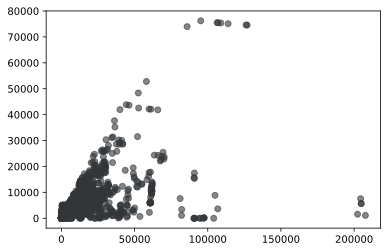

In [102]:
fig, ax = plt.subplots()
ax.scatter(df['followers'], df['following'], alpha=.6, color='#32363A')
plt.show()

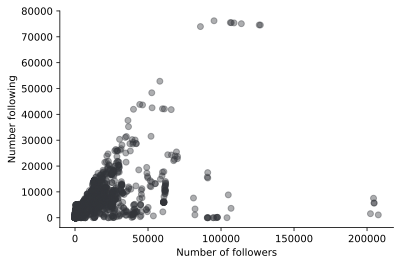

In [105]:
fig, ax = plt.subplots()
ax.scatter(df['followers'], df['following'], alpha=.4, color='#32363A')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlabel('Number of followers')
ax.set_ylabel('Number following')

plt.show()

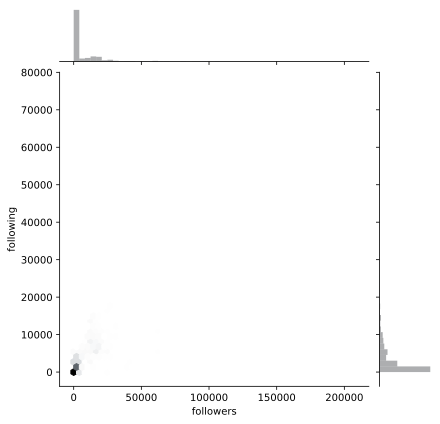

In [110]:
# this would be OK too with logged axes 
sns.jointplot(df['followers'], df['following'], kind="hex", color="#32363A")
plt.show()

# HEATMAPS

> **NOTE**: This dataset doesn't lend itself very well to this kind of plot until getting to some of the later content (day 5) on unstructured data. Maybe just punt this over there? 

In [119]:
need_other_data_for_this = df.corr() # not actually meaningful matrix 
need_other_data_for_this

following  followers   updates   retweet  new_june_2018  \
following       1.000000   0.615159  0.127053 -0.299115      -0.155363   
followers       0.615159   1.000000  0.217276 -0.322419      -0.085826   
updates         0.127053   0.217276  1.000000 -0.153928       0.133392   
retweet        -0.299115  -0.322419 -0.153928  1.000000       0.136023   
new_june_2018  -0.155363  -0.085826  0.133392  0.136023       1.000000   
tweet_id        0.126384   0.096595  0.172939 -0.023291      -0.344073   

               tweet_id  
following      0.126384  
followers      0.096595  
updates        0.172939  
retweet       -0.023291  
new_june_2018 -0.344073  
tweet_id       1.000000

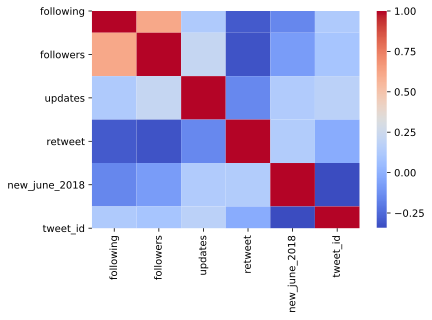

In [148]:
sns.heatmap(need_other_data_for_this, cmap='coolwarm')
ax.tick_params(axis='both', which='both', length=0)
plt.show()

# DENSITY & CONTOUR PLOTS

# PLOTTING TIME SERIES DATA

In [153]:
df['publish_date']

80071     10/11/2016 12:48
48954      11/8/2016 15:17
141170     1/31/2017 20:09
175919    12/18/2015 18:28
114457     2/17/2018 21:30
                ...       
26281       4/2/2015 18:21
130875     10/8/2015 18:35
141455      6/24/2016 9:40
195673    12/19/2016 16:08
229075     11/16/2015 8:55
Name: publish_date, Length: 5000, dtype: object

In [155]:
dt = pd.to_datetime(df['publish_date'].tolist())
type(dt)

pandas.core.indexes.datetimes.DatetimeIndex

In [156]:
dt

DatetimeIndex(['2016-10-11 12:48:00', '2016-11-08 15:17:00',
               '2017-01-31 20:09:00', '2015-12-18 18:28:00',
               '2018-02-17 21:30:00', '2016-10-17 02:47:00',
               '2016-06-16 02:36:00', '2015-06-11 17:53:00',
               '2017-02-26 17:48:00', '2017-04-30 20:59:00',
               ...
               '2017-02-14 13:57:00', '2016-12-07 00:27:00',
               '2016-08-16 08:14:00', '2016-06-01 13:16:00',
               '2017-06-01 17:19:00', '2015-04-02 18:21:00',
               '2015-10-08 18:35:00', '2016-06-24 09:40:00',
               '2016-12-19 16:08:00', '2015-11-16 08:55:00'],
              dtype='datetime64[ns]', length=5000, freq=None)

In [175]:
dt.day

Int64Index([11,  8, 31, 18, 17, 17, 16, 11, 26, 30,
            ...
            14,  7, 16,  1,  1,  2,  8, 24, 19, 16],
           dtype='int64', length=5000)

In [176]:
dt.week

Int64Index([41, 45,  5, 51,  7, 42, 24, 24,  8, 17,
            ...
             7, 49, 33, 22, 22, 14, 41, 25, 51, 47],
           dtype='int64', length=5000)

In [177]:
dt.year

Int64Index([2016, 2016, 2017, 2015, 2018, 2016, 2016, 2015, 2017, 2017,
            ...
            2017, 2016, 2016, 2016, 2017, 2015, 2015, 2016, 2016, 2015],
           dtype='int64', length=5000)

In [204]:
df['Year'] = dt.year
df['Month'] = dt.month
df['Day'] = dt.day

In [212]:
grouped = df.groupby(['Year', 'Month', 'Day']).size().sort_values(ascending=False).reset_index()

grouped = grouped.rename(
    columns={0:'Number of (sampled) tweets'}
)

grouped = grouped.sort_values(['Year', 'Month', 'Day'], ascending=True)

In [213]:
grouped.sample(20)

Year  Month  Day  Number of (sampled) tweets
107  2016     10   31                          10
931  2017     10   17                           1
670  2017     11   25                           3
616  2015     10   21                           3
523  2015      2   11                           4
348  2015     12   10                           6
516  2015      5   27                           4
841  2015      5   21                           1
239  2015      8   30                           7
135  2015     10   26                           9
880  2015      5   17                           1
457  2017      1    1                           5
295  2015      9    5                           6
372  2015     12    2                           5
679  2017      5   19                           3
374  2016      8   12                           5
711  2015      9    9                           2
609  2016      1   30                           3
286  2016     11    3                           6
90   2016     12   11                          10

# ANNOTATING PLOTS

# SMALL MULTIPLES

# PLOTTING GEOSPATIAL DATA

# ADDITIONAL CUSTOMIZATIONS

# SAVING FIGURES FOR PUBLICATION OR THE WEB